In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from factor_analyzer.rotator import Rotator
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = "parameters_phd.csv"  # Path to your uploaded CSV file
data = pd.read_csv(file_path)

# Separate the `ligand` column
ligand_column = data['ligand']
data_numeric = data.drop(columns=['ligand'])
data_numeric = data_numeric.fillna(data_numeric.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Save the transformed data to a new CSV file
pca_df = pd.DataFrame(data_pca, columns=['Component 1', 'Component 2', 'Component 3'])
pca_df['ligand'] = ligand_column.values
# output_file = "/mnt/data/pca_output.csv"
# pca_df.to_csv(output_file, index=False)
#
# print(f"PCA completed. Transformed data saved to {output_file}")
pca_df

Component 1  Component 2  Component 3  ligand
0       5.903836     0.386168     3.929735  dcPAMP
1       2.891843    -1.872325     3.861452    dcpa
2       1.611508    -4.250493     4.584580  diprpa
3       2.535437     1.956118    -3.224293   DS-10
4       3.930009     1.261301    -3.414409   DS-11
..           ...          ...          ...     ...
282     2.411168     2.705329    -2.773335   MS-90
283   -17.261091     7.231310    -0.851907   MS-91
284     3.832145     3.738993     6.433733   MS-92
285     7.553524     1.575750     7.467331   MS-93
286     0.472355    -1.160465    -1.732841    MS-9

[287 rows x 4 columns]

np.int64(13)

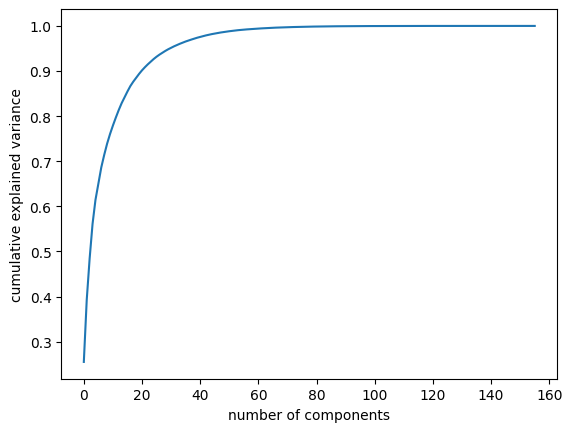

In [3]:
pca_test = PCA().fit(data_scaled)
cumsum_variance = np.cumsum(pca_test.explained_variance_ratio_)
plt.plot(cumsum_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
num_components_geometric = np.argmax(cumsum_variance >= 0.80) + 1
num_components_geometric

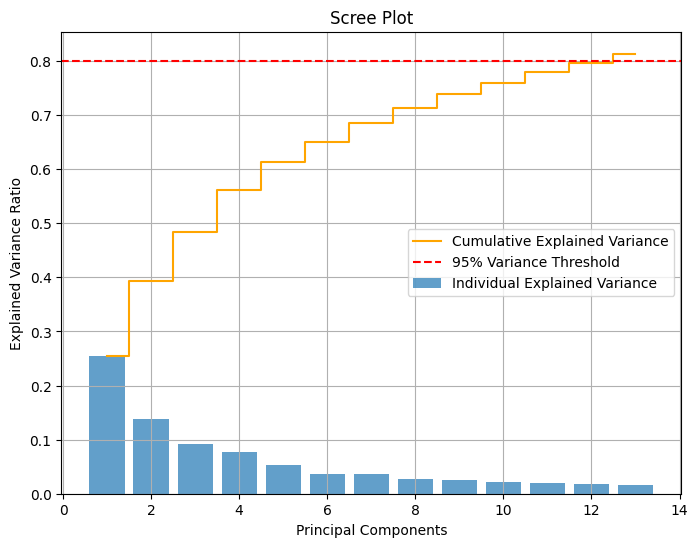

In [4]:
# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance', color='orange')
plt.axhline(y=0.8, color='r', linestyle='--', label='95% Variance Threshold')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()

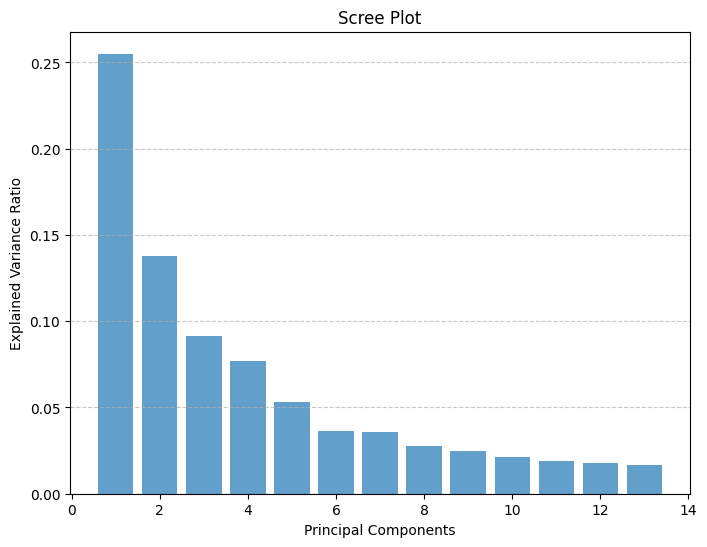

In [5]:
# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a bar plot for the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
feature_names = [col for col in data.columns if col != 'ligand']

loadings_geometric = pd.DataFrame(
    pca_test.components_,
    columns=feature_names,  # Feature names
    index=[f'PC{i+1}' for i in range(len(pca_test.components_))]
)
loadings_geometric

homo      lumo    dipole  rh_charge  rh_LP_1_occ  rh_LP_1_eng  \
PC1   0.058398  0.062892 -0.026098   0.146803     0.034550     0.072727   
PC2   0.145942  0.115181 -0.037381   0.020716    -0.040949     0.138097   
PC3  -0.049918 -0.048737  0.054759   0.062032     0.000486    -0.056753   
PC4  -0.075810 -0.131177  0.081357  -0.006587    -0.076043    -0.096759   
PC5  -0.039884  0.054458  0.012304   0.004814     0.033828    -0.037728   
PC6  -0.043697 -0.018888  0.017262   0.004044    -0.067366    -0.037030   
PC7   0.083271  0.085524  0.002760  -0.023689    -0.017748     0.080609   
PC8   0.002944 -0.057438  0.085391   0.047488     0.061080    -0.005449   
PC9  -0.010531  0.000312 -0.152186  -0.017764    -0.126786    -0.006739   
PC10 -0.027754  0.001615  0.036525  -0.036917    -0.156845    -0.063512   
PC11  0.128506  0.101540 -0.050978  -0.030594     0.056223     0.124603   
PC12 -0.056624 -0.106297  0.047771   0.036708     0.024761    -0.077211   
PC13 -0.085939 -0.009156 -0.078625   0.031261    -0.085319     0.013377   

      rh_LP_2_occ  rh_LP_2_eng  rh_LP_3_occ  rh_LP_3_eng  ...  Vbur%_5.0  \
PC1      0.129457     0.086504    -0.110198     0.075682  ...   0.059163   
PC2      0.009372     0.145360    -0.026066     0.146136  ...   0.133841   
PC3      0.024668    -0.051473     0.073466    -0.038405  ...   0.163690   
PC4     -0.107913    -0.078263     0.088691    -0.093157  ...  -0.009392   
PC5      0.000519    -0.011029    -0.001133    -0.015200  ...   0.016104   
PC6     -0.027209    -0.031781    -0.073808    -0.010398  ...   0.026039   
PC7     -0.017213     0.058216     0.025803     0.067870  ...  -0.014442   
PC8     -0.011443     0.010271     0.006923    -0.002216  ...  -0.082294   
PC9     -0.037328     0.075391     0.031850     0.062858  ...   0.012531   
PC10     0.062891    -0.047771     0.203025    -0.077820  ...   0.020570   
PC11     0.029178     0.060104     0.087116     0.098070  ...  -0.030621   
PC12    -0.008402    -0.030454    -0.018849    -0.040622  ...   0.015443   
PC13    -0.035584    -0.053098     0.053164    -0.043242  ...   0.047035   

        NE_5.0    NW_5.0    SE_5.0    SW_5.0  Vbur%_6.0    NE_6.0    NW_6.0  \
PC1   0.050756  0.030594  0.072304  0.032130   0.042453  0.038979  0.023525   
PC2   0.079348  0.103035  0.104443  0.125779   0.158616  0.115944  0.122829   
PC3   0.158768  0.132350  0.108958  0.109881   0.133840  0.126276  0.110189   
PC4   0.010280 -0.047605  0.032824 -0.020751   0.010790  0.034842 -0.039849   
PC5   0.015229 -0.015984 -0.005813  0.054249  -0.010677 -0.006062 -0.037727   
PC6  -0.017866  0.190663  0.023242 -0.113039   0.044063 -0.012641  0.174921   
PC7   0.147572  0.049456 -0.178523 -0.058154   0.001780  0.140086  0.033082   
PC8   0.014425 -0.064227 -0.025751 -0.168028  -0.084767 -0.034885 -0.056190   
PC9   0.074999  0.000035  0.001175 -0.031314  -0.003028  0.024211  0.002091   
PC10  0.016782  0.018312  0.005168  0.022811  -0.020684 -0.037298 -0.006357   
PC11 -0.055861 -0.025494 -0.029574  0.011881   0.001408 -0.022505  0.001332   
PC12 -0.081279  0.171403 -0.166988  0.105086  -0.002074 -0.083623  0.142464   
PC13  0.140486 -0.016591  0.002395  0.026132   0.068693  0.150546 -0.015688   

        SE_6.0    SW_6.0  
PC1   0.049705  0.026006  
PC2   0.135019  0.142662  
PC3   0.094767  0.105571  
PC4   0.051285 -0.011170  
PC5  -0.030689  0.040011  
PC6   0.065136 -0.085212  
PC7  -0.127092 -0.034776  
PC8  -0.049656 -0.134882  
PC9  -0.025092 -0.010053  
PC10 -0.037929  0.013984  
PC11  0.000944  0.024214  
PC12 -0.142175  0.076818  
PC13  0.009998  0.081948  

[13 rows x 156 columns]

In [7]:
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(loadings_geometric.values)

# Create a DataFrame for rotated loadings_geometric
rotated_loadings_df = pd.DataFrame(
    rotated_loadings,
    columns=loadings_geometric.columns,
    index=loadings_geometric.index
)
rotated_loadings_df

homo          lumo        dipole     rh_charge   rh_LP_1_occ  \
PC1  -8.813751e-17  1.413192e-16  1.201591e-16  1.000000e+00 -2.008427e-16   
PC2  -2.370756e-16 -6.267801e-17 -2.319208e-17  2.755481e-11  3.226508e-17   
PC3   8.955240e-17 -2.414045e-17  1.297083e-16  5.118803e-11 -4.788715e-17   
PC4   1.828103e-16 -5.236076e-17 -2.845166e-16  6.096077e-11  3.114743e-17   
PC5  -9.818708e-17 -7.774264e-17  1.443176e-16 -3.407155e-11 -5.023551e-17   
PC6   3.081335e-16  1.157582e-16 -2.276653e-17  3.868483e-10  6.763133e-17   
PC7  -1.212221e-16 -4.840312e-17  5.136665e-17  5.848511e-10 -1.550993e-16   
PC8   3.308217e-17  7.810357e-17 -7.275746e-18  1.518467e-11 -4.387399e-17   
PC9   1.585390e-16  3.932524e-17  1.345617e-16 -3.931502e-10  3.466804e-17   
PC10 -2.751301e-16  7.882903e-17  1.037357e-16 -4.698885e-11 -1.132703e-16   
PC11  1.551834e-16  9.192562e-17 -2.396775e-17  1.133922e-10  3.659643e-17   
PC12  6.691964e-16  5.875627e-17 -2.474244e-17 -4.054747e-11 -5.840268e-17   
PC13  3.415185e-16 -1.405980e-16 -1.271885e-17  2.212720e-10  9.882239e-17   

       rh_LP_1_eng   rh_LP_2_occ   rh_LP_2_eng   rh_LP_3_occ   rh_LP_3_eng  \
PC1  -1.982677e-17 -2.733404e-16 -1.827988e-16 -9.435754e-17  9.100440e-17   
PC2   5.971574e-17  8.132134e-17 -6.685892e-17 -1.899463e-17 -8.140564e-17   
PC3   8.786341e-18  2.655065e-18  1.052788e-16  1.115824e-17 -2.811651e-18   
PC4   5.782275e-17 -7.025860e-17 -2.169992e-17  1.021084e-16 -9.271768e-17   
PC5  -3.325403e-17  1.933162e-16  1.110081e-16 -2.608032e-17  1.023230e-16   
PC6  -6.546126e-17 -2.665723e-16 -2.249319e-16 -1.058043e-16 -1.552130e-16   
PC7  -1.638370e-16 -2.720120e-16 -3.300209e-17  2.561901e-17  1.137427e-16   
PC8  -1.320488e-16  2.233586e-16  5.200515e-17  9.600317e-17 -5.914220e-18   
PC9   2.456086e-17  3.374329e-17  9.549685e-17  1.387491e-17  9.838911e-17   
PC10 -1.375235e-16 -5.331009e-17 -5.401680e-18 -3.238984e-17  1.092985e-16   
PC11  4.411220e-17  1.056473e-16  8.423432e-17 -7.531701e-17 -2.094300e-17   
PC12 -1.027568e-16 -7.382671e-17 -1.041468e-16 -2.085420e-17 -5.298351e-17   
PC13  7.879772e-17  1.519532e-16 -4.041433e-17  1.954700e-17 -3.688638e-17   

      ...     Vbur%_5.0        NE_5.0        NW_5.0        SE_5.0  \
PC1   ... -5.118827e-11  3.075896e-17  1.090706e-16  4.419486e-17   
PC2   ...  3.989391e-11 -2.133607e-17  1.242247e-17 -7.467990e-17   
PC3   ...  1.000000e+00  4.742839e-17  4.149021e-17  5.970330e-17   
PC4   ... -1.979374e-11  1.032655e-17  6.086416e-19 -2.181665e-17   
PC5   ...  1.549048e-11 -1.147589e-16  4.377494e-20 -4.883841e-17   
PC6   ...  1.437076e-10 -4.108837e-17 -7.050289e-17  5.734590e-17   
PC7   ...  1.924650e-10  1.060472e-17  9.024151e-17 -5.447391e-17   
PC8   ... -1.133890e-10  7.073782e-17 -5.223201e-17  9.032857e-17   
PC9   ... -1.354656e-10  2.006091e-17  2.755583e-18 -3.866699e-18   
PC10  ... -1.228237e-10 -3.864400e-17  4.239614e-17 -2.715013e-17   
PC11  ... -1.480732e-10  1.182417e-17 -6.165495e-17  5.293427e-17   
PC12  ...  7.976615e-11 -3.677037e-17 -1.255394e-17 -7.349882e-17   
PC13  ...  2.288457e-10  7.337837e-19  1.311813e-17 -1.132483e-16   

            SW_5.0     Vbur%_6.0        NE_6.0        NW_6.0        SE_6.0  \
PC1   5.063825e-18 -2.755443e-11 -1.873501e-16  1.734723e-17  6.938894e-17   
PC2   5.466646e-18  1.000000e+00 -4.163336e-17 -2.775558e-17  1.387779e-17   
PC3   2.004869e-17 -3.989423e-11  4.857226e-17 -4.510281e-17 -2.775558e-17   
PC4  -4.217494e-17  4.992938e-11  2.775558e-17  0.000000e+00  5.551115e-17   
PC5  -2.182748e-17  1.371832e-10 -1.249001e-16  3.469447e-18 -4.857226e-17   
PC6  -2.309248e-17  2.051857e-10 -5.204170e-17 -6.938894e-17  2.081668e-17   
PC7   4.019321e-17  2.266459e-10 -1.127570e-16  5.551115e-17 -1.387779e-17   
PC8   1.213309e-17 -2.688922e-10  1.179612e-16 -2.081668e-17  1.249001e-16   
PC9   8.873627e-17  8.159791e-11 -5.551115e-17 -5.551115e-17  1.387779e-17   
PC10  6.789288e-17  1.310029e-10  9.497611e-17 -6.938894e-18 -3.642919e-17   
PC1

In [8]:
# Extract the most relevant features for each factor
top_n = 5  # Number of top features to select per factor
most_relevant_features = {}

for factor in rotated_loadings_df.index:
    # Get top N features by absolute loading
    top_features = rotated_loadings_df.loc[factor].abs().nlargest(top_n).index.tolist()
    most_relevant_features[factor] = top_features

# Display results
for factor, features in most_relevant_features.items():
    print(f"{factor}: {features}")

PC1: ['rh_charge', 'p2_c4_dist', 'NE_2.0', 'NW_3.0', 'p2_r4_antibond_eng']
PC2: ['Vbur%_6.0', 'p2_bridge_bond_occ_no_rh', 'p2_c4_dist', 'NW_3.0', 'c2_nbo']
PC3: ['Vbur%_5.0', 'p2_r4_antibond_eng', 'p2_c4_dist', 'c2_nbo', 'NW_3.0']
PC4: ['lumo_no_rh', 'p2_bridge_bond_occ_no_rh', 'NW_3.0', 'p2_c4_dist', 'r1_p1_rh_angle']
PC5: ['p2_bridge_dist', 'Vbur%_6.0', 'lumo_no_rh', 'p2_bridge_bond_occ_no_rh', 'p2_c4_dist']
PC6: ['NW_3.0', 'rh_charge', 'c2_nbo', 'Vbur%_6.0', 'Vbur%_5.0']
PC7: ['p2_c4_dist', 'rh_charge', 'Vbur%_6.0', 'Vbur%_5.0', 'c2_nbo']
PC8: ['p2_bridge_bond_occ_no_rh', 'NE_2.0', 'Vbur%_6.0', 'lumo_no_rh', 'Vbur%_5.0']
PC9: ['NE_2.0', 'rh_charge', 'p2_bridge_bond_occ_no_rh', 'Vbur%_5.0', 'NW_3.0']
PC10: ['Vbur%_2.0', 'Vbur%_6.0', 'Vbur%_5.0', 'p2_bridge_bond_occ_no_rh', 'lumo_no_rh']
PC11: ['c2_nbo', 'NW_3.0', 'Vbur%_6.0', 'Vbur%_5.0', 'p2_r4_antibond_eng']
PC12: ['r1_p1_rh_angle', 'NW_3.0', 'Vbur%_5.0', 'lumo_no_rh', 'NE_2.0']
PC13: ['p2_r4_antibond_eng', 'Vbur%_5.0', 'rh_charge'

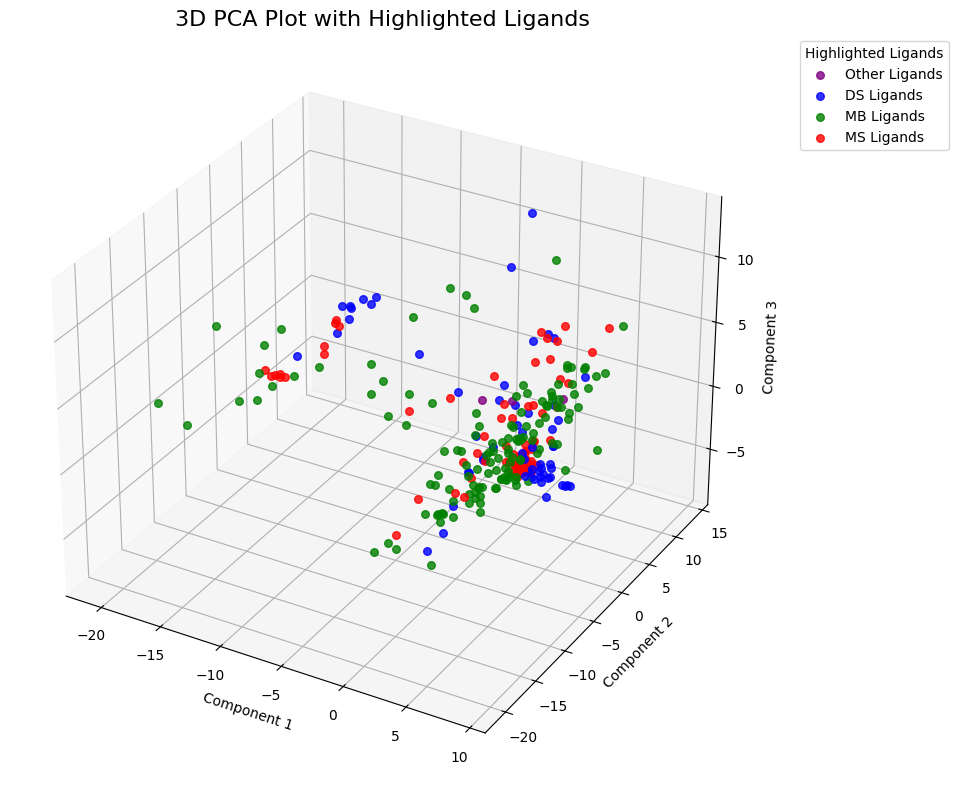

In [9]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}
labels_added = {key: False for key in categories}

for ligand in pca_df['ligand'].unique():
    subset = pca_df[pca_df['ligand'] == ligand]
    if "DS" in ligand:
        category = "DS"
    elif "MS" in ligand:
        category = "MS"
    elif "MB" in ligand:
        category = "MB"
    else:
        category = "Other"

    ax.scatter(
        subset['Component 1'],
        subset['Component 2'],
        subset['Component 3'],
        color=categories[category]["color"],
        s=30,
        alpha=0.8,
        label=categories[category]["label"] if not labels_added[category] else None
    )
    labels_added[category] = True

ax.set_title('3D PCA Plot with Highlighted Ligands', fontsize=16)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Highlighted Ligands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Initialize a Plotly figure
fig = go.Figure()

# Add scatter traces for each category
for category, properties in categories.items():
    subset = pca_df[
        pca_df['ligand'].str.contains(category) if category != "Other" else ~pca_df['ligand'].str.contains("DS|MS|MB")
    ]
    fig.add_trace(
        go.Scatter3d(
            x=subset['Component 1'],
            y=subset['Component 2'],
            z=subset['Component 3'],
            mode='markers',
            marker=dict(size=5, color=properties["color"]),
            name=properties["label"],  # Legend label
            text=subset['ligand'],  # Hover text
            hoverinfo="text"  # Display only hover text
        )
    )

# Customize layout
fig.update_layout(
    title='3D PCA Plot with Highlighted Ligands',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    legend=dict(title="Ligand Categories")
)

# Show plot
fig.show()

In [11]:
import plotly.express as px

# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Assign a category to each ligand for color coding
def get_category(ligand):
    if "DS" in ligand:
        return "DS Ligands"
    elif "MS" in ligand:
        return "MS Ligands"
    elif "MB" in ligand:
        return "MB Ligands"
    else:
        return "Other Ligands"

pca_df['category'] = pca_df['ligand'].apply(get_category)

# Define a function to plot 2D slices
def plot_2d_slice(x, y, x_label, y_label):
    fig = px.scatter(
        pca_df,
        x=x,
        y=y,
        color='category',
        color_discrete_map={
            "DS Ligands": "blue",
            "MS Ligands": "red",
            "MB Ligands": "green",
            "Other Ligands": "purple",
        },
        hover_data={'ligand': True},  # Show ligand names on hover
        title=f'2D PCA Slice: {x_label} vs {y_label}',
        labels={'category': 'Ligand Category'}
    )
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Ligand Categories"
    )
    return fig

# Generate and display 2D slices
fig1 = plot_2d_slice('Component 1', 'Component 2', 'Component 1', 'Component 2')
fig2 = plot_2d_slice('Component 1', 'Component 3', 'Component 1', 'Component 3')
fig3 = plot_2d_slice('Component 2', 'Component 3', 'Component 2', 'Component 3')

# Show the figures
fig1.show()
fig2.show()
fig3.show()

In [12]:
geometric = [
	"bite_angle",
	"c1_rh_dist",
	"c2_rh_dist",
	"c3_rh_dist",
	"c4_rh_dist",
	"p1_c1_dist",
	"p1_c2_dist",
	"p2_c3_dist",
	"p2_c4_dist",
	"p1_bridge_dist",
	"p2_bridge_dist",
	"p1_angle_sum",
	"p2_angle_sum",
	"rh_p1_bridge_angle",
	"rh_p2_bridge_angle",
	"r1_p1_rh_angle",
	"r2_p1_rh_angle",
	"r3_p2_rh_angle",
	"r4_p2_rh_angle",
	"r1_p1_bridge_angle",
	"r2_p1_bridge_angle",
	"r3_p2_bridge_angle",
	"r4_p2_bridge_angle"
]

steric = [
	"Vbur%_1.0",
	"NE_1.0",
	"NW_1.0",
	"SE_1.0",
	"SW_1.0",
	"Vbur%_2.0",
	"NE_2.0",
	"NW_2.0",
	"SE_2.0",
	"SW_2.0",
	"Vbur%_3.0",
	"NE_3.0",
	"NW_3.0",
	"SE_3.0",
	"SW_3.0",
	"Vbur%_4.0",
	"NE_4.0",
	"NW_4.0",
	"SE_4.0",
	"SW_4.0",
	"Vbur%_5.0",
	"NE_5.0",
	"NW_5.0",
	"SE_5.0",
	"SW_5.0",
	"Vbur%_6.0",
	"NE_6.0",
	"NW_6.0",
	"SE_6.0",
	"SW_6.0"
]

electronic = [
	"homo",
	"lumo",
	"dipole",
	"rh_charge",
	"rh_LP_1_occ",
	"rh_LP_1_eng",
	"rh_LP_2_occ",
	"rh_LP_2_eng",
	"rh_LP_3_occ",
	"rh_LP_3_eng",
	"rh_LP_4_occ",
	"rh_LP_4_eng",
	"homo_no_rh",
	"lumo_no_rh",
	"dipole_no_rh",
	"r1_nbo",
	"r2_nbo",
	"r3_nbo",
	"r4_nbo",
	"bridge_nbo",
	"p1_nbo",
	"p2_nbo",
	"c1_nbo",
	"c2_nbo",
	"c3_nbo",
	"c4_nbo",
	"p1_nmr",
	"p1_nmr_aniso",
	"p2_nmr",
	"p2_nmr_aniso",
	"p1_rh_bond_occ",
	"p2_rh_bond_occ",
	"p1_rh_bond_eng",
	"p2_rh_bond_eng",
	"p1_rh_antibond_occ",
	"p2_rh_antibond_occ",
	"p1_rh_antibond_eng",
	"p2_rh_antibond_eng",
	"p1_r1_bond_occ",
	"p1_r2_bond_occ",
	"p2_r3_bond_occ",
	"p2_r4_bond_occ",
	"p1_r1_bond_eng",
	"p1_r2_bond_eng",
	"p2_r3_bond_eng",
	"p2_r4_bond_eng",
	"p1_r1_antibond_occ",
	"p1_r2_antibond_occ",
	"p2_r3_antibond_occ",
	"p2_r4_antibond_occ",
	"p1_r1_antibond_eng",
	"p1_r2_antibond_eng",
	"p2_r3_antibond_eng",
	"p2_r4_antibond_eng",
	"p1_bridge_bond_occ",
	"p2_bridge_bond_occ",
	"p1_bridge_bond_eng",
	"p2_bridge_bond_eng",
	"p1_bridge_antibond_occ",
	"p2_bridge_antibond_occ",
	"p1_bridge_antibond_eng",
	"p2_bridge_antibond_eng",
	"p1_nbo_no_rh",
	"p2_nbo_no_rh",
	"r1_nbo_no_rh",
	"r2_nbo_no_rh",
	"r3_nbo_no_rh",
	"r4_nbo_no_rh",
	"bridge_nbo_no_rh",
	"p1_nmr_no_rh",
	"p1_nmr_aniso_no_rh",
	"p2_nmr_no_rh",
	"p2_nmr_aniso_no_rh",
	"p1_LP_occ_no_rh",
	"p1_LP_eng_no_rh",
	"p2_LP_occ_no_rh",
	"p2_LP_eng_no_rh",
	"p1_r1_bond_occ_no_rh",
	"p1_r2_bond_occ_no_rh",
	"p2_r3_bond_occ_no_rh",
	"p2_r4_bond_occ_no_rh",
	"p1_r1_bond_eng_no_rh",
	"p1_r2_bond_eng_no_rh",
	"p2_r3_bond_eng_no_rh",
	"p2_r4_bond_eng_no_rh",
	"p1_r1_antibond_occ_no_rh",
	"p1_r2_antibond_occ_no_rh",
	"p2_r3_antibond_occ_no_rh",
	"p2_r4_antibond_occ_no_rh",
	"p1_r1_antibond_eng_no_rh",
	"p1_r2_antibond_eng_no_rh",
	"p2_r3_antibond_eng_no_rh",
	"p2_r4_antibond_eng_no_rh",
	"p1_bridge_bond_occ_no_rh",
	"p2_bridge_bond_occ_no_rh",
	"p1_bridge_bond_eng_no_rh",
	"p2_bridge_bond_eng_no_rh",
	"p1_bridge_antibond_occ_no_rh",
	"p2_bridge_antibond_occ_no_rh",
	"p1_bridge_antibond_eng_no_rh",
	"p2_bridge_antibond_eng_no_rh",
	"p1_LP_s_occ_no_rh",
	"p2_LP_s_occ_no_rh"
]

In [13]:
data_scaled_name = pd.DataFrame(data_scaled, columns=data_numeric.columns)

# Create PCAs for each group of parameters. They will have as many components as parameters has the group
pca_geometric = PCA().fit(data_scaled_name[geometric])
pca_electronic = PCA().fit(data_scaled_name[electronic])
pca_steric = PCA().fit(data_scaled_name[steric])

# Get the number of PC that explain >= 80 % of the variance for each PCA and recalculate PCA with the obtained value
cumsum_variance_geometric = np.cumsum(pca_geometric.explained_variance_ratio_)
num_components_geometric = np.argmax(cumsum_variance_geometric >= 0.80) + 1
pca_geometric = PCA(n_components=num_components_geometric).fit(data_scaled_name[geometric])

cumsum_variance_electronic = np.cumsum(pca_electronic.explained_variance_ratio_)
num_components_electronic = np.argmax(cumsum_variance_electronic >= 0.80) + 1
pca_electronic = PCA(n_components=num_components_electronic).fit(data_scaled_name[electronic])

cumsum_variance_steric = np.cumsum(pca_steric.explained_variance_ratio_)
num_components_steric = np.argmax(cumsum_variance_steric >= 0.80) + 1
pca_steric = PCA(n_components=num_components_steric).fit(data_scaled_name[steric])

# Get the loadings for each PCA
loadings_geometric = pd.DataFrame(
    pca_geometric.components_,
    columns=geometric,
    index=[f'PC{i+1}' for i in range(num_components_geometric)]
)
loadings_electronic = pd.DataFrame(
    pca_electronic.components_,
    columns=electronic,
    index=[f'PC{i+1}' for i in range(num_components_electronic)]
)
loadings_steric = pd.DataFrame(
    pca_steric.components_,
    columns=steric,
    index=[f'PC{i+1}' for i in range(num_components_steric)]
)

# Perform varimax rotation for each of the loadings
rotated_geometric = Rotator(method='varimax').fit_transform(loadings_geometric.values)
rotated_electronic = Rotator(method='varimax').fit_transform(loadings_electronic.values)
rotated_steric = Rotator(method='varimax').fit_transform(loadings_steric.values)

varimax_geometric = pd.DataFrame(
    rotated_geometric,
    columns=loadings_geometric.columns,
    index=loadings_geometric.index
)
varimax_electronic = pd.DataFrame(
    rotated_electronic,
    columns=loadings_electronic.columns,
    index=loadings_electronic.index
)
varimax_steric = pd.DataFrame(
    rotated_steric,
    columns=loadings_steric.columns,
    index=loadings_steric.index
)

# Extract the most relevant features for each factor
top_features_geometric = {}
top_features_electronic = {}
top_features_steric = {}

for factor in varimax_geometric.index:
    top_features = varimax_geometric.loc[factor].abs().nlargest(5).index.tolist()
    top_features_geometric[factor] = top_features

for factor in varimax_electronic.index:
    top_features = varimax_electronic.loc[factor].abs().nlargest(5).index.tolist()
    top_features_electronic[factor] = top_features

for factor in varimax_steric.index:
    top_features = varimax_steric.loc[factor].abs().nlargest(5).index.tolist()
    top_features_steric[factor] = top_features

print("---- GEOMETRIC TOP FEATURES ----")
for factor, features in top_features_geometric.items():
    print(f"{factor}: {features}")
print("\n---- ELECTRONIC TOP FEATURES ----")
for factor, features in top_features_electronic.items():
    print(f"{factor}: {features}")
print("\n---- STERIC TOP FEATURES ----")
for factor, features in top_features_steric.items():
    print(f"{factor}: {features}")

---- GEOMETRIC TOP FEATURES ----
PC1: ['bite_angle', 'r4_p2_rh_angle', 'r2_p1_rh_angle', 'p2_angle_sum', 'p2_c3_dist']
PC2: ['r3_p2_bridge_angle', 'r4_p2_rh_angle', 'p2_angle_sum', 'r2_p1_rh_angle', 'r4_p2_bridge_angle']
PC3: ['p2_c3_dist', 'p2_angle_sum', 'r4_p2_rh_angle', 'r3_p2_bridge_angle', 'bite_angle']
PC4: ['p2_angle_sum', 'r4_p2_rh_angle', 'p2_c3_dist', 'r2_p1_rh_angle', 'r3_p2_bridge_angle']
PC5: ['p1_angle_sum', 'r2_p1_rh_angle', 'r4_p2_bridge_angle', 'r4_p2_rh_angle', 'bite_angle']
PC6: ['r4_p2_bridge_angle', 'r4_p2_rh_angle', 'r3_p2_bridge_angle', 'p1_angle_sum', 'p2_angle_sum']
PC7: ['r4_p2_rh_angle', 'r2_p1_rh_angle', 'p2_angle_sum', 'r3_p2_bridge_angle', 'p2_c3_dist']
PC8: ['r2_p1_rh_angle', 'r4_p2_rh_angle', 'p1_angle_sum', 'p2_angle_sum', 'bite_angle']

---- ELECTRONIC TOP FEATURES ----
PC1: ['p1_r2_bond_eng_no_rh', 'p2_bridge_antibond_eng', 'p2_rh_bond_occ', 'lumo_no_rh', 'c4_nbo']
PC2: ['rh_LP_4_eng', 'rh_LP_4_occ', 'c4_nbo', 'p2_rh_bond_occ', 'p2_bridge_antibond_en

In [14]:
pca_geometric_trans = pca_geometric.transform(data_scaled_name[geometric])
pca_electronic_trans = pca_electronic.transform(data_scaled_name[electronic])
pca_steric_trans = pca_steric.transform(data_scaled_name[steric])

print(pca_geometric.explained_variance_ratio_)
print(pca_electronic.explained_variance_ratio_)
print(pca_steric.explained_variance_ratio_)

[0.22179451 0.1183544  0.10153389 0.09026613 0.08929431 0.07292511
 0.06654644 0.05116355]
[0.32240632 0.16770123 0.09965413 0.06555793 0.05838852 0.03025218
 0.02520726 0.02348907 0.02120427]
[0.42818836 0.130849   0.10201145 0.08830636 0.07453808]


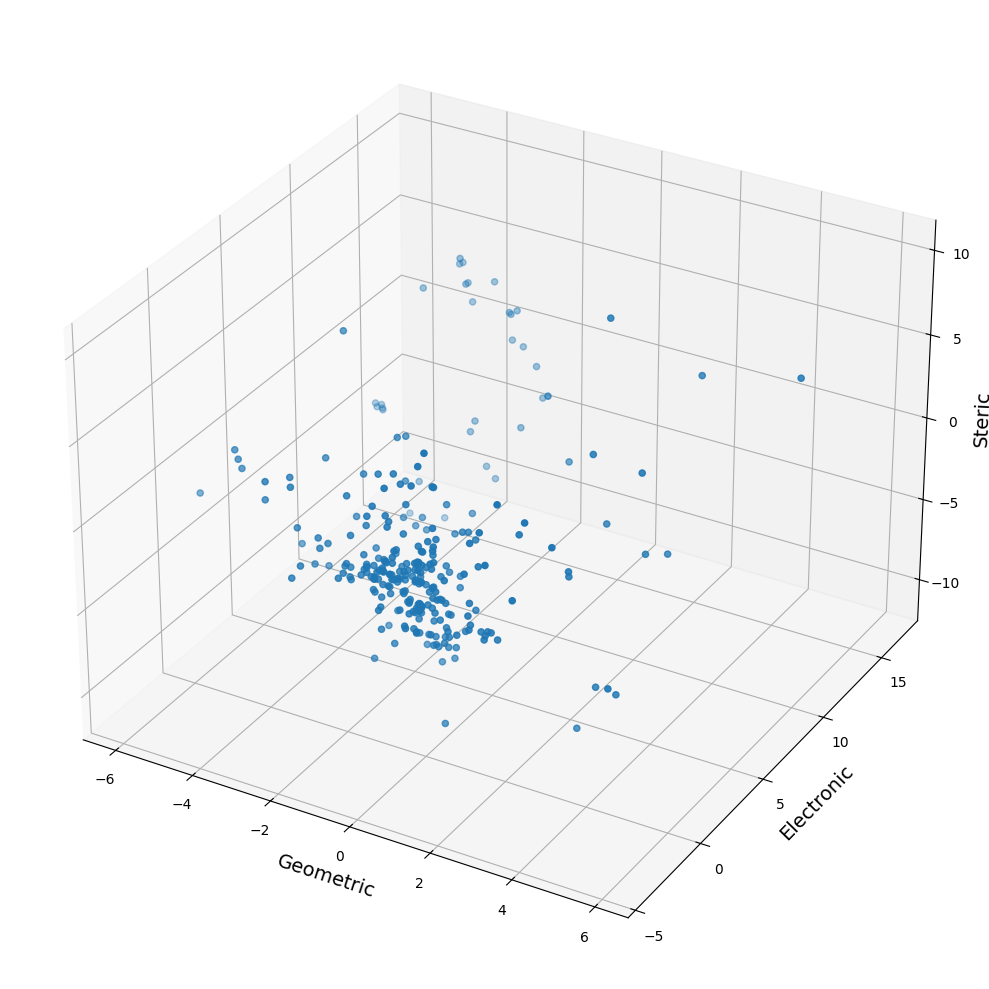

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_geometric_trans[:,0], pca_electronic_trans[:,0], pca_steric_trans[:,0])

ax.set_xlim3d(min(pca_geometric_trans[:,0]), max(pca_geometric_trans[:,0]))
ax.set_ylim3d(min(pca_electronic_trans[:,0]), max(pca_electronic_trans[:,0]))
ax.set_zlim3d(min(pca_steric_trans[:,0]), max(pca_steric_trans[:,0]))

ax.set_xlabel('Geometric', fontsize=14)
ax.set_ylabel('Electronic', fontsize=14)
ax.set_zlabel('Steric', fontsize=14)

plt.tight_layout()
plt.show()

In [16]:
pca_results = pd.DataFrame({"ligand": data["ligand"],"geometric": pca_geometric_trans[:, 0], "electronic": pca_electronic_trans[:, 0], "steric": pca_steric_trans[:, 0]})
pca_results.to_csv("pca_results.csv", index=False)

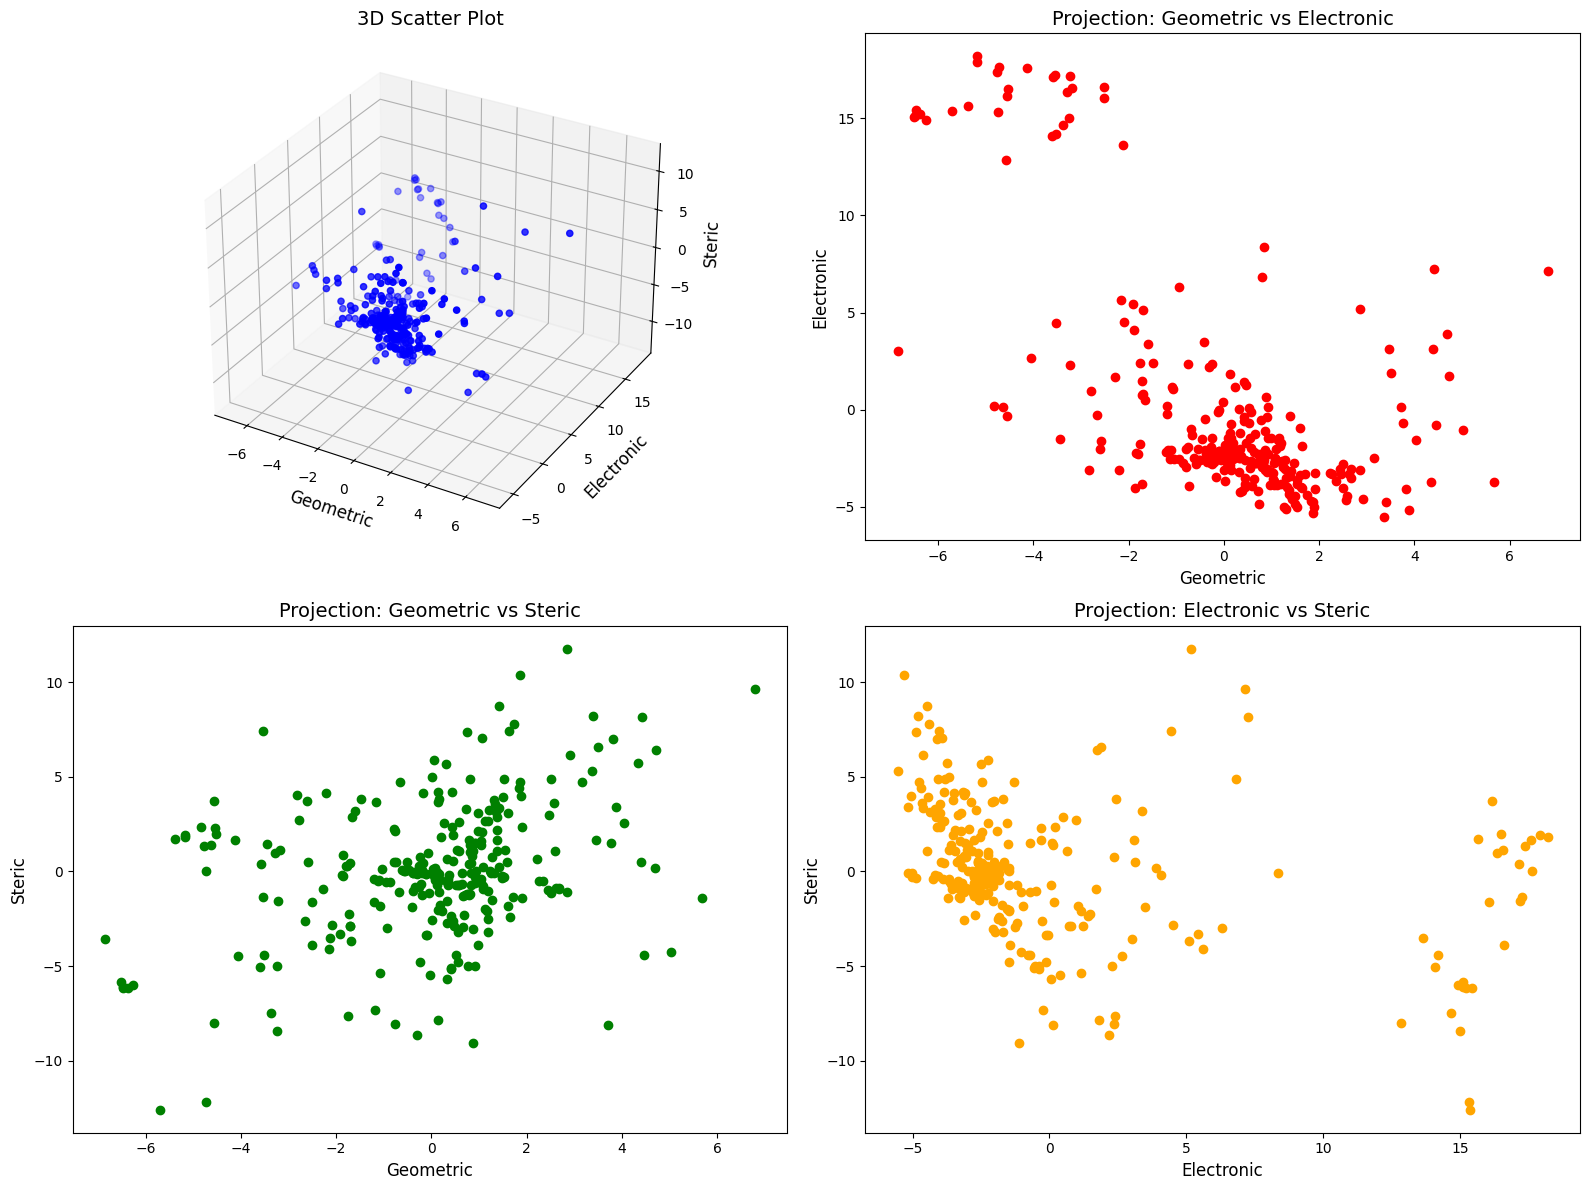

In [17]:
fig = plt.figure(figsize=(16, 12))

# 3D plot
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(
    pca_geometric_trans[:, 0],
    pca_electronic_trans[:, 0],
    pca_steric_trans[:, 0],
    c='b'
)
ax1.set_xlabel('Geometric', fontsize=12)
ax1.set_ylabel('Electronic', fontsize=12)
ax1.set_zlabel('Steric', fontsize=12)
ax1.set_title('3D Scatter Plot', fontsize=14)

# XY plane projection
ax2 = fig.add_subplot(222)
ax2.scatter(
    pca_geometric_trans[:, 0],
    pca_electronic_trans[:, 0],
    c='r'
)
ax2.set_xlabel('Geometric', fontsize=12)
ax2.set_ylabel('Electronic', fontsize=12)
ax2.set_title('Projection: Geometric vs Electronic', fontsize=14)

# XZ plane projection
ax3 = fig.add_subplot(223)
ax3.scatter(
    pca_geometric_trans[:, 0],
    pca_steric_trans[:, 0],
    c='g'
)
ax3.set_xlabel('Geometric', fontsize=12)
ax3.set_ylabel('Steric', fontsize=12)
ax3.set_title('Projection: Geometric vs Steric', fontsize=14)

# YZ plane projection
ax4 = fig.add_subplot(224)
ax4.scatter(
    pca_electronic_trans[:, 0],
    pca_steric_trans[:, 0],
    c='orange'
)
ax4.set_xlabel('Electronic', fontsize=12)
ax4.set_ylabel('Steric', fontsize=12)
ax4.set_title('Projection: Electronic vs Steric', fontsize=14)

plt.tight_layout()
plt.show()


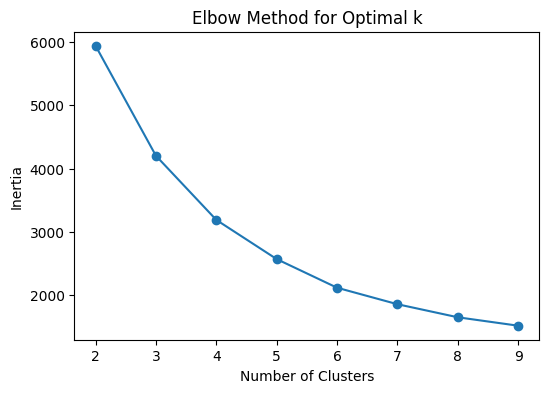

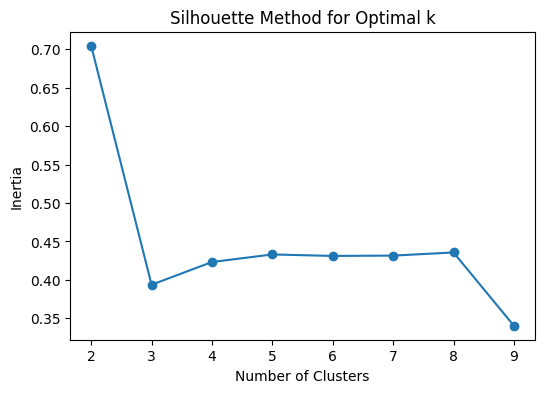

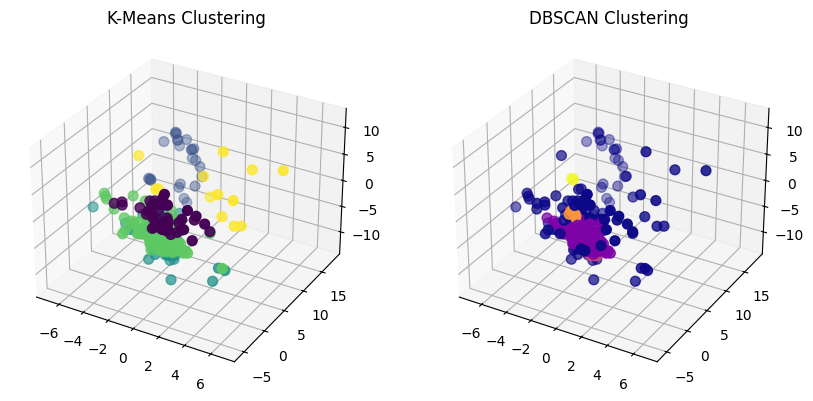

Silhouette Score for K-Means: 0.4330727744423533
Silhouette Score for DBSCAN: -0.02637032392817381


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load data
file_path = "pca_results.csv"  # Update with your actual file path
data = pd.read_csv(file_path)
X = data[['geometric', 'electronic', 'steric']].values

# K-Means Clustering with Elbow Method
inertia = []
silhouette = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.predict(X)
    silhouette.append(silhouette_score(X, labels))

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Method
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Silhouette Method for Optimal k')
plt.show()

# Fit K-Means with optimal k (adjust based on elbow method result)
k_optimal = 5  # Change based on elbow point
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Fit DBSCAN (adjust parameters for best clustering)
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# 3D Scatter Plot for K-Means
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels, cmap='viridis', s=50)
ax.set_title('K-Means Clustering')

# 3D Scatter Plot for DBSCAN
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=dbscan_labels, cmap='plasma', s=50)
ax.set_title('DBSCAN Clustering')

plt.show()

# Evaluate clustering
print("Silhouette Score for K-Means:", silhouette_score(X, kmeans_labels))
if len(set(dbscan_labels)) > 1:  # Check if DBSCAN found clusters
    print("Silhouette Score for DBSCAN:", silhouette_score(X, dbscan_labels))
else:
    print("DBSCAN did not find meaningful clusters. Try adjusting eps/min_samples.")


In [19]:
data["group"] = kmeans_labels

In [20]:
data

ligand  geometric  electronic    steric  group
0    dcPAMP   1.497549   -4.435639  3.949071      0
1      dcpa   4.034010   -1.561339  2.580402      0
2    diprpa   3.765913   -0.696845  1.485258      3
3     DS-10   1.085849   -2.594909 -0.915738      3
4     DS-11   2.667958   -3.548068 -0.922574      3
..      ...        ...         ...       ...    ...
282   MS-90  -0.184186   -2.459822  0.423910      3
283   MS-91  -3.544198   17.266091 -1.374539      1
284   MS-92  -2.206203   -3.093466  4.162104      0
285   MS-93   2.919140   -4.620182  6.178674      0
286    MS-9  -0.685365   -1.021772 -1.071844      3

[287 rows x 5 columns]

[13:58:41] atom 9 has specified valence (4) smaller than the drawn valence 5.
[13:58:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[13:58:41] ERROR: Could not sanitize molecule ending on line 11107
[13:58:41] ERROR: Explicit valence for atom # 2 C, 5, is greater than permitted
[13:58:41] Skipping unrecognized collection type at line 15870: MDLV30/STERAC1 BONDS=(1 31)
[13:58:41] Skipping unrecognized collection type at line 18594: MDLV30/STERAC1 BONDS=(1 33)
[13:58:41] Skipping unrecognized collection type at line 26043: MDLV30/STERAC1 BONDS=(1 37)
[13:58:41] Skipping unrecognized collection type at line 26175: MDLV30/STERAC1 BONDS=(1 37)
[13:58:41] Skipping unrecognized collection type at line 30775: MDLV30/STERAC1 BONDS=(1 45)
[13:58:41] Skipping unrecognized collection type at line 32283: MDLV30/STERAC1 BONDS=(1 51)


Molecule Name        cas.rn  \
0             1,1′-Methylenebis[1,1-dimethylphosphine]    64065-08-3   
1                   Phosphine, ethylidenebis[dimethyl-    95837-98-2   
2    1,1-Bis(dimethylphosphino)-N,N-dimethylmethana...    40207-88-3   
3            2,2′-Methylenebis[1,3,2-dioxaphospholane]   129195-14-8   
4    [[Bis(1-methylethyl)phosphino]methyl]dimethylp...   905831-48-3   
..                                                 ...           ...   
291                                                     2408832-18-6   
292  1,1′-Methylenebis[1,1-bis[2,3,5,6-tetrafluoro-...  1260109-29-2   
293  1,1′-Methylenebis[2,3,4,5-tetraphenyl-1H-phosp...    34673-82-0   
294                                                     2408830-92-0   
295  Phosphine, methylenebis[bis[4-(3,3,4,4,5,5,6,6...   872598-31-7   

    molecular.formula molecular.weight              Dataset Name  \
0             C5H14P2           136.11          methylene bridge   
1             C6H16P2           150.14  monosubstituted C-bridge   
2            C7H19NP2           179.18        substituted bridge   
3           C5H10O4P2           196.08          methylene bridge   
4             C9H22P2           192.22          methylene bridge   
..                ...              ...                       ...   
291          C57H86P2           833.24          methylene bridge   
292        C29H2F28P2           944.23          methylene bridge   
293          C57H42P2           788.89          methylene bridge   
294         C73H118P2          1057.67          methylene bridge   
295       C65H34F68P2          2168.81          methylene bridge   

                                                  Link  \
0                                                        
1    https://www.degruyter.com/document/doi/10.1515...   
2    https://www.sciencedirect.com/science/article/...   
3     https://pubs.acs.org/doi/abs/10.1021/ic00344a049   
4    https://www.thieme-connect.de/products/ebooks/...   
..                                                 ...   
291  https://pubs.rsc.org/en/content/articlelanding...   
292  https://pubs.rsc.org/en/content/articlelanding...   
293  https://www.sciencedirect.com/science/article/...   
294  https://pubs.rsc.org/en/content/articlelanding...   
295  https://chemistry-europe.onlinelibrary.wiley.c...   

                                                 Ref 2 BBDD  \
0                                          211 results        
1    Zeitschrift fuer Naturforschung, Teil B: Anorg...        
2    Journal of Organometallic Chemistry (1972), 46...        
3                 Inorg. Chem. 1990, 29, 19, 3896–3898        
4    Inorganica Chimica Acta (2006), 359(10), 3191-...        
..                                                 ...  ...   
291          Green Chemistry (2019), 21(23), 6307-6317        
292          Green Chemistry (2019), 21(23), 6307-6317        
293                Tetrahedron (1971), 27(22), 5523-37        
294  Green Chemistry (2022), 24(20), 8069-8075\nGre...        
295  European Journal of Organic Chemistry (2005), ...        

                                                   CSD    Code  \
0    58 structures\nIr, Ru, Mo, Fe, Ni, Re, Co, W, ...    MB-1   
1                                         0 structures    MB-2   
2                                         0 structures   MS-70   
3                                         0 structures    MB-3   
4                                          YELNEJ (Ni)    MB-4   
..                                                 ...     ...   
291                                       0 structures  MB-138   
292                               DIDQAK (free ligand)  MB-139   
293                                       0 structures  MB-140   
294                                       0 structures  MB-141   
295                                       0 structures  MB-142   

       Calculations                                     cas.index.name  \
0    Opt, SPE, NoRh                   
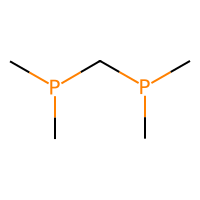
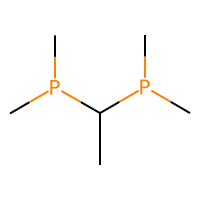
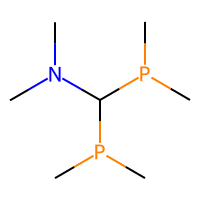
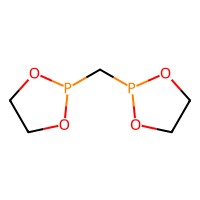
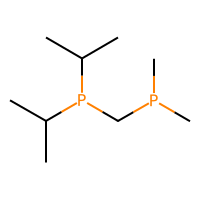
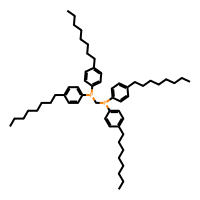
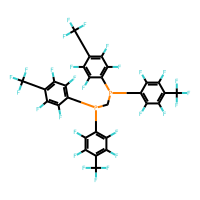
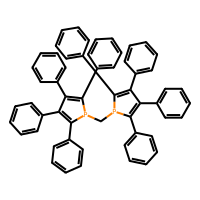
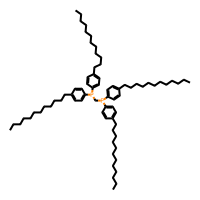
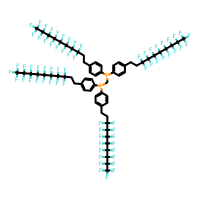

In [21]:
from rdkit import Chem
from rdkit.Chem import PandasTools

sdf_file = "C-bridge_selected.sdf"
df = PandasTools.LoadSDF(sdf_file)

# Now `df` is a pandas DataFrame containing the molecule data along with the chemical structures.
# The column with the molecules will typically be called 'ROMol', and you can represent these molecules using RDKit.

# Example: Print the first molecule's structure
# molecule = df.iloc[0]['ROMol']
# Chem.Draw.MolToImage(molecule)

df

In [22]:
merged_df = pd.merge(df, data, left_on='Code', right_on="ligand", how='inner')
merged_df

Molecule Name        cas.rn  \
0             1,1′-Methylenebis[1,1-dimethylphosphine]    64065-08-3   
1                   Phosphine, ethylidenebis[dimethyl-    95837-98-2   
2    1,1-Bis(dimethylphosphino)-N,N-dimethylmethana...    40207-88-3   
3            2,2′-Methylenebis[1,3,2-dioxaphospholane]   129195-14-8   
4    [[Bis(1-methylethyl)phosphino]methyl]dimethylp...   905831-48-3   
..                                                 ...           ...   
278  1,1′-Methylenebis[1,1-bis[4-[2-(trimethylsilyl...  1054648-90-6   
279                                                     1791455-21-4   
280  Phosphine, methylenebis[phenyl(3-phenyl-1H-nap...   205379-20-0   
281  1,1′-Methylenebis[1,1-bis[2,3,5,6-tetrafluoro-...  1260109-29-2   
282  1,1′-Methylenebis[2,3,4,5-tetraphenyl-1H-phosp...    34673-82-0   

    molecular.formula molecular.weight              Dataset Name  \
0             C5H14P2           136.11          methylene bridge   
1             C6H16P2           150.14  monosubstituted C-bridge   
2            C7H19NP2           179.18        substituted bridge   
3           C5H10O4P2           196.08          methylene bridge   
4             C9H22P2           192.22          methylene bridge   
..                ...              ...                       ...   
278       C45H54P2Si4           769.20          methylene bridge   
279        C47H52O2P2           710.86          methylene bridge   
280      C47H36B2O4P2           748.36          methylene bridge   
281        C29H2F28P2           944.23          methylene bridge   
282          C57H42P2           788.89          methylene bridge   

                                                  Link  \
0                                                        
1    https://www.degruyter.com/document/doi/10.1515...   
2    https://www.sciencedirect.com/science/article/...   
3     https://pubs.acs.org/doi/abs/10.1021/ic00344a049   
4    https://www.thieme-connect.de/products/ebooks/...   
..                                                 ...   
278  https://pubs.rsc.org/en/content/articlelanding...   
279  https://pubs.rsc.org/en/content/articlelanding...   
280                                                  -   
281  https://pubs.rsc.org/en/content/articlelanding...   
282  https://www.sciencedirect.com/science/article/...   

                                                 Ref 2 BBDD  \
0                                          211 results        
1    Zeitschrift fuer Naturforschung, Teil B: Anorg...        
2    Journal of Organometallic Chemistry (1972), 46...        
3                 Inorg. Chem. 1990, 29, 19, 3896–3898        
4    Inorganica Chimica Acta (2006), 359(10), 3191-...        
..                                                 ...  ...   
278  Organic & Biomolecular Chemistry (2009), 7(8),...        
279  Chemical Communications (Cambridge, United Kin...        
280  Russian Journal of General Chemistry (Translat...        
281          Green Chemistry (2019), 21(23), 6307-6317        
282                Tetrahedron (1971), 27(22), 5523-37        

                                                   CSD    Code  \
0    58 structures\nIr, Ru, Mo, Fe, Ni, Re, Co, W, ...    MB-1   
1                                         0 structures    MB-2   
2                                         0 structures   MS-70   
3                                         0 structures    MB-3   
4                                          YELNEJ (Ni)    MB-4   
..                                                 ...     ...   
278                                       0 structures  MB-135   
279                                       0 structures  MB-136   
280                                       0 structures  MB-137   
281                               DIDQAK (free ligand)  MB-139   
282                                       0 structures  MB-140   

       Calculations                                     cas.index.name  \
0    Opt, SPE, NoRh                   

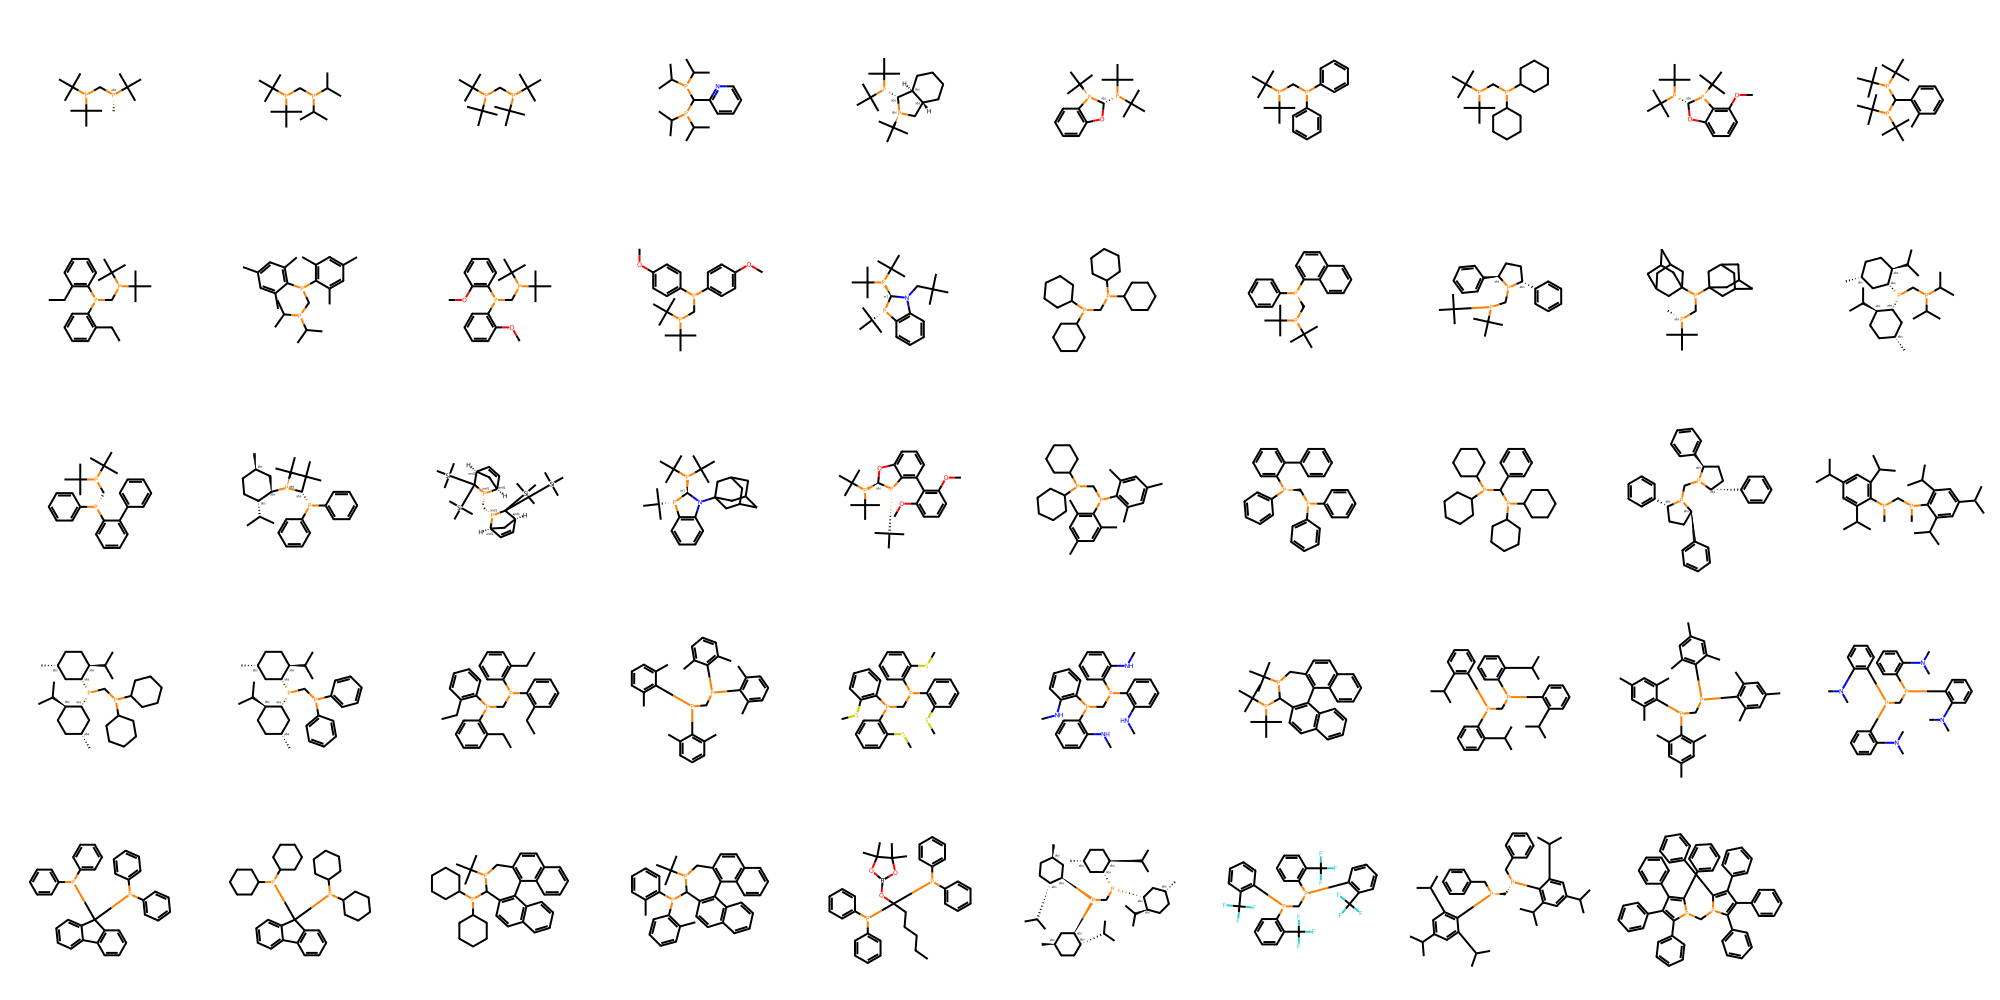

In [27]:
from rdkit.Chem import Draw

# Get all molecules from the 'ROMol' column
molecules = merged_df[merged_df["group"] == 0]['ROMol'].tolist()

# Create a grid of images
Draw.MolsToGridImage(molecules, molsPerRow=10, maxMols=300)